The goal of this notebook is to test an algorithm that may be implemented in the **registration** notebook. 

The principle is to compare two profiles in order to find the offset required in order to minimize the difference between the two profiles

key points:
 * use absolute value when doing the difference
 * narrow down the range of motion of the second profile over the "reference" one, something like 10 or 20 pixels for example

# import 

In [36]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib notebook


# load profile 

In [2]:
filename = "data/vertical_profiles.txt"
assert os.path.exists(filename)

In [3]:
pd_data = pd.read_csv(filename, skiprows=9)

In [4]:
pd_data

,##y_axis,# col.1,# col.2
0,560,0.528983,0.518230
1,561,0.542648,0.513951
2,562,0.550394,0.531603
3,563,0.546004,0.515176
4,564,0.559552,0.505158
...,...,...,...
323,883,1.021830,0.995650
324,884,1.002355,1.006492
325,885,1.003664,1.019801
326,886,1.000419,1.018811


In [5]:
x_axis = np.asarray(pd_data['##y_axis'])
profile1 = np.asarray(pd_data['# col.1'])
profile2 = np.asarray(pd_data['# col.2'])
# profile2 = profile1[:]

## before applying an offset 

<IPython.core.display.Javascript object>


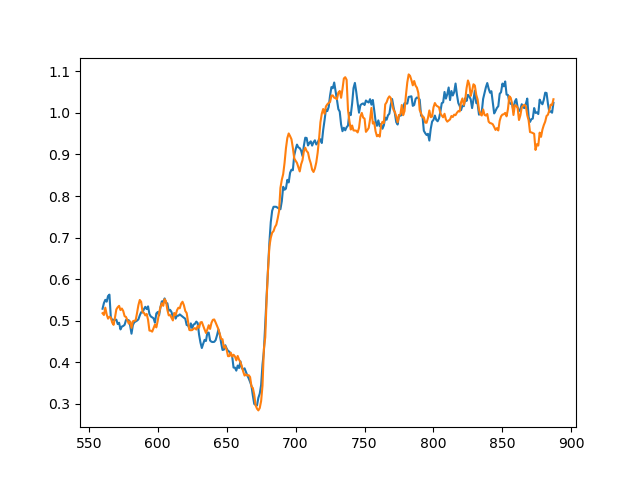

In [31]:
fig, ax = plt.subplots(num="before offset")
ax.plot(x_axis, profile1, x_axis, profile2)

## applying an offset of 5 pixels on profile2 

In [34]:
xoffset = 5

profile2_shifted = np.roll(profile2, xoffset)
profile2_shifted[:xoffset] = profile2_shiftted[xoffset]

<IPython.core.display.Javascript object>


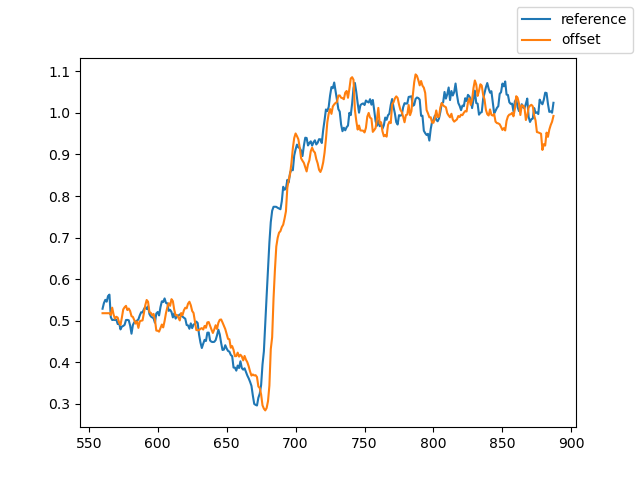

In [37]:
fig, ax = plt.subplots(num=f"after offset by {xoffset} pixels to the right")
ax.plot(x_axis, profile1, label='reference')
ax.plot(x_axis, profile2_shifted, label='offset')
fig.legend()

# trying the algo on this data set 

In [22]:
rolling_offset = 20

In [23]:
list_profiles = []
for _offset in np.arange(-rolling_offset, rolling_offset):
    list_profiles.append(np.roll(profile2_shifted, _offset))

In [24]:
def sum_abs_diff(profile_a, profile_b):
    list_diff = profile_a - profile_b
    abs_list_diff = [np.abs(_value) for _value in list_diff]
    return np.sum(abs_list_diff)

In [25]:
list_sum_abs_diff = []
for _profile in list_profiles:
    list_sum_abs_diff.append(sum_abs_diff(_profile, profile1))

<IPython.core.display.Javascript object>


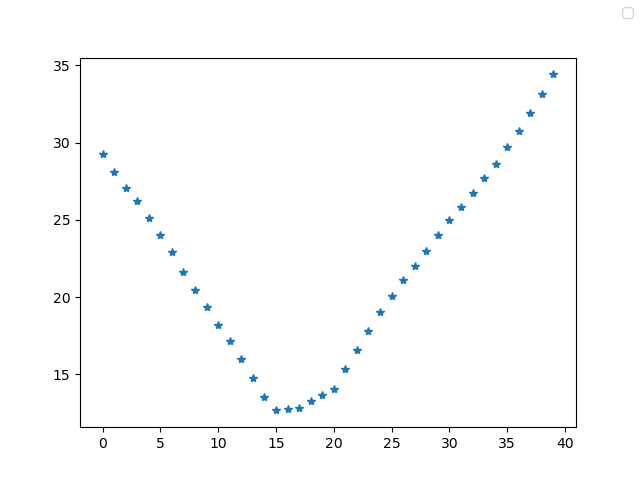

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [26]:
fig, ax = plt.subplots(num=f"list sum abs diff")
ax.plot(list_sum_abs_diff, '*')
fig.legend()

In [27]:
min_value = np.min(list_sum_abs_diff)
print(min_value)
min_index = np.where(min_value == list_sum_abs_diff)[0][0]
print(min_index)

12.664655069999998
15


In [28]:
offset_to_apply = rolling_offset - min_index
print(f"{offset_to_apply = }")

offset_to_apply = 5


!!!! works great

# Let's try with a negative offset 

In [53]:
xoffset = -7

profile2_shifted = np.roll(profile2, xoffset)
profile2_shifted[xoffset:] = profile2_shiftted[xoffset]

<IPython.core.display.Javascript object>


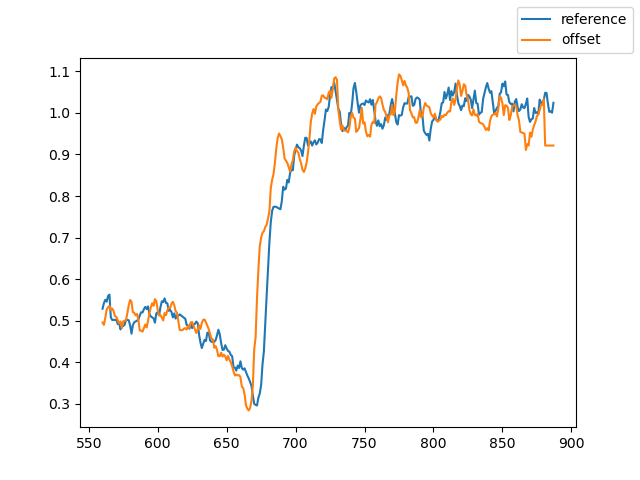

In [54]:
fig, ax = plt.subplots(num=f"after offset by {xoffset} pixels to the right")
ax.plot(x_axis, profile1, label='reference')
ax.plot(x_axis, profile2_shifted, label='offset')
fig.legend()

In [58]:
list_profiles = []
for _offset in np.arange(-rolling_offset, rolling_offset):
    list_profiles.append(np.roll(profile2_shifted, _offset))

In [59]:
rolling_offset = 20

In [60]:
list_sum_abs_diff = []
for _profile in list_profiles:
    list_sum_abs_diff.append(sum_abs_diff(_profile, profile1))

<IPython.core.display.Javascript object>


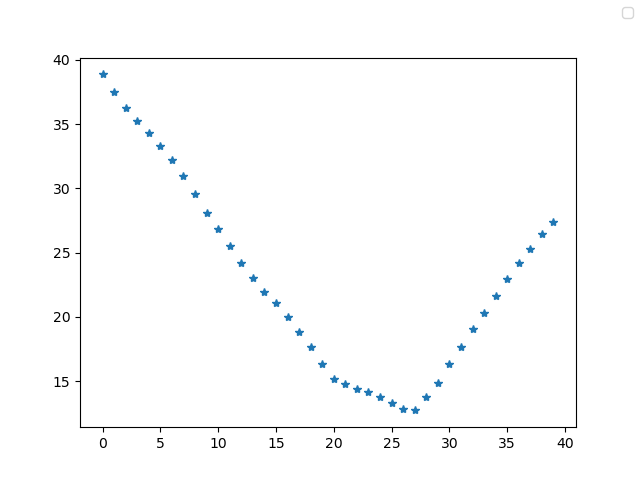

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [61]:
fig, ax = plt.subplots(num=f"list sum abs diff")
ax.plot(list_sum_abs_diff, '*')
fig.legend()

In [62]:
min_value = np.min(list_sum_abs_diff)
print(min_value)
min_index = np.where(min_value == list_sum_abs_diff)[0][0]
print(min_index)

12.730308189999999
27


In [65]:
offset_found = rolling_offset - min_index
print(f"{offset_found = }")

offset_found = -7


# let's automate the whole process 

In [66]:
profile_reference = profile1
profile_work = profile2_shifted

In [69]:
def sum_abs_diff(profile_a, profile_b):
    list_diff = profile_a - profile_b
    abs_list_diff = [np.abs(_value) for _value in list_diff]
    return np.sum(abs_list_diff)

def calculate_pixel_offset(profile_reference=None, working_profile=None, max_pixel_range=20):
    list_profiles = []
    for _offset in np.arange(-max_pixel_range, max_pixel_range):
        list_profiles.append(np.roll(working_profile, _offset))
        
    list_sum_abs_diff = []
    for _profile in list_profiles:
        list_sum_abs_diff.append(sum_abs_diff(_profile, profile1))
        
    min_value = np.min(list_sum_abs_diff)
    min_index = np.where(min_value == list_sum_abs_diff)[0][0]
        
    offset_found = max_pixel_range - min_index
        
    return offset_found

In [70]:
print(calculate_pixel_offset(profile_reference=profile_reference, working_profile=profile_work))

-7
